# Credit card fraud detection

# Insights to be generated:  

    1. A change in frequency of orders placed
    2. Orders that are significantly higher than a user’s average transaction.
    3. Bulk orders of the same item with slight variations
    4. A sudden change in delivery preference
    5. A mismatched IP Address, or an IP Address that is not from the general location or area of the billing address.

# Lifecycle followed:
    1. Credit card data collection
    2. Data Wrangling
    3. Model Building
    4. Evaluation

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/dataset/creditcard.csv")

### Data Profiling

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
A.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
A.shape

(284807, 31)

In [7]:
A.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing value treatment

In [8]:
A.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values present!

# Exploratory Data Analysis

In [9]:
print("\nTransaction: Legit- 0 || Fraudulent- 1")
A["Class"].value_counts()


Transaction: Legit- 0 || Fraudulent- 1


0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

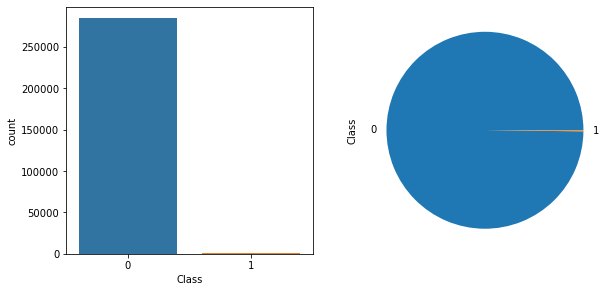

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,10)) #rows, columns

plt.subplot(2,3,1) #rows, columns, plot_number
sb.countplot(A.Class)

plt.subplot(2,3,2)
A.Class.value_counts().plot(kind="pie")

## Insights generated:
- The number of fraudulent transaction (1) is very less 

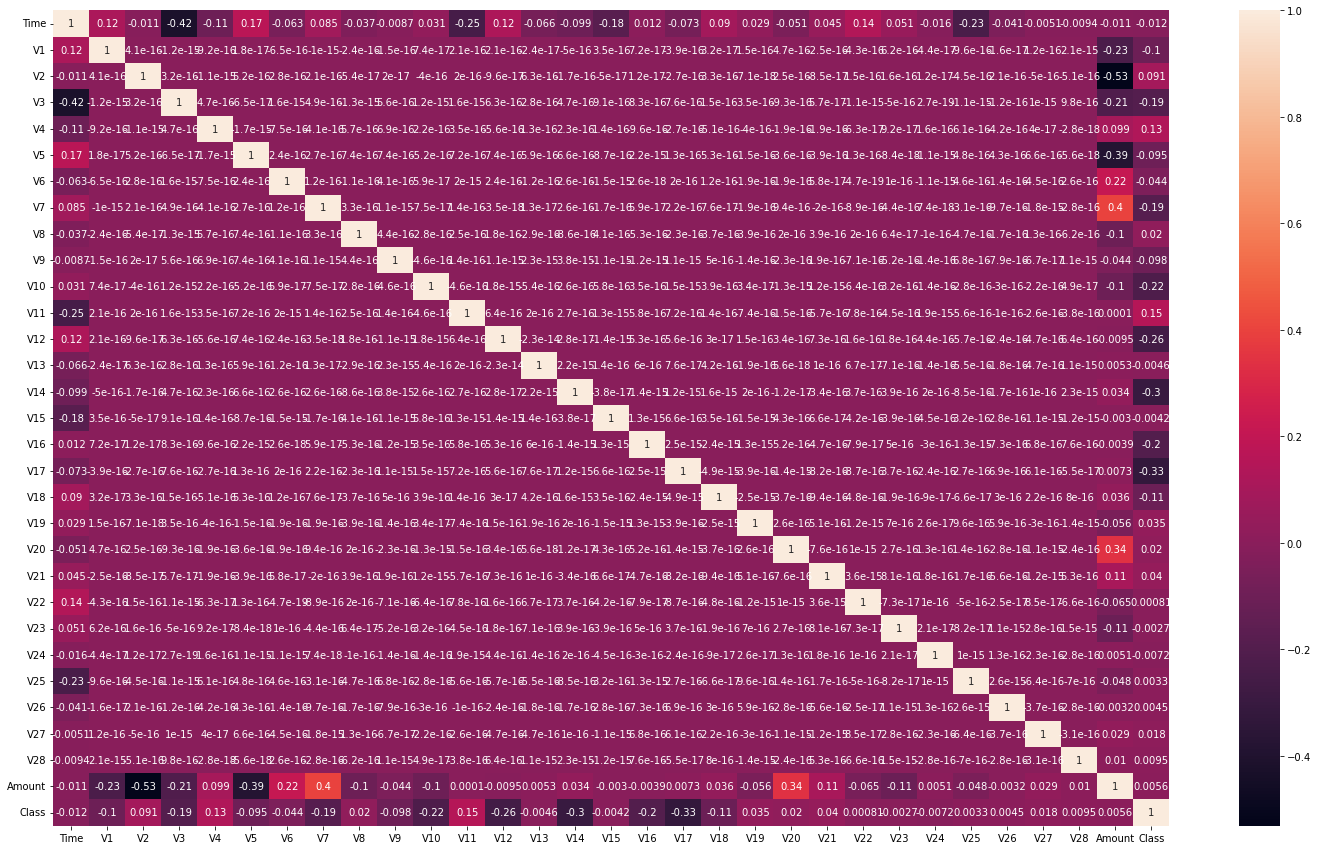

In [11]:
plt.rcParams['figure.figsize'] = [25, 15] #mention the size of the plot (customisable)
corr=A.corr()
sb.heatmap(corr,annot=True)
plt.show()

In [12]:
A.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

Splitting the data into legit and fraudulent

In [13]:
legit= A[A.Class==0]
fraudulent= A[A.Class==1]

In [14]:
print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Insights generated:
    1. mean= fraudulent amount > legit amount [cant be judged completely as dataset isn't balanced]

In [17]:
A.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## =========================================================================

# Treating the unbalance data:
- Random under Sampling
- Random over sampling

## ----------------------------------------------------------------------------------------------------------------------------------

##  Random Under Sampling
Building a sample dataset containing similar distribution of normal transactions & fraudulent ones

In [18]:
#should perform when the dataset is huge

legit_sample= legit.sample(n=492)

In [19]:
new_set_RUS=pd.concat([legit_sample,fraudulent],axis=0)#rows 

In [20]:
new_set_RUS.index= range(0,984,1)

In [21]:
new_set_RUS.shape

(984, 31)

In [22]:
new_set_RUS.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,141828.0,-0.468808,-0.011439,1.362622,-0.698545,0.109123,0.162348,-0.194708,0.456808,0.528625,-0.530831,0.082809,-0.742567,-2.664237,0.381959,-0.410825,0.548216,-0.621209,0.927101,-0.119016,-0.183588,0.306057,0.763170,-0.056532,0.689829,-0.680892,0.460376,0.119174,0.175284,11.5,0
1,73246.0,1.086934,0.111122,0.341237,0.922047,0.026490,0.352399,-0.152084,0.247077,-0.140441,0.099821,1.657691,0.780499,-0.602765,0.690609,0.840230,-0.261163,-0.115961,-0.406613,-0.855176,-0.204633,0.179452,0.557207,-0.066903,-0.282747,0.481462,-0.254430,0.043676,0.005764,14.9,0
2,151117.0,1.623791,-0.748668,-1.974103,0.639106,0.054509,-1.224132,0.873403,-0.529218,0.297399,-0.007213,-0.875295,0.425960,0.073825,0.462525,-0.418985,-0.633531,-0.023380,-0.877759,0.073554,0.257423,0.148844,0.119940,-0.172629,0.002410,0.150674,0.588110,-0.141886,-0.037880,246.4,0


In [23]:
new_set_RUS['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

data has been uniformly distributed!

In [24]:
new_set_RUS.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93325.447154,0.062512,0.044939,0.084662,-0.026606,0.043160,-0.025500,-0.031504,0.001820,0.021449,-0.048115,0.008441,0.003256,-0.000376,-0.044227,-0.001962,0.002677,0.083029,0.006158,0.024824,0.000720,0.013155,-0.030979,-0.027184,0.00953,0.032367,0.024723,0.029549,0.018480,79.118943
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
# new_set_RUS.to_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/new_set_RUS.csv")

## ----------------------------------------------------------------------------------------------------------------------------------

## Random Over Sampling

In [26]:
from sklearn.utils import resample

In [27]:
Legit= A[A.Class==0] #not fraud (0)
fraud=A[A.Class==1]

fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(Legit), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Legit, fraud_upsampled])

In [28]:
upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
upsampled.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [30]:
# upsampled.to_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/new_set_ROS.csv")

## Models that can be built using classification are:

- Logitic Regression
- Decision Tree Classifier
- Naive Bayes
- Random Forest Classifier

### Model 1 - LOGISTIC REGRESSION

### Steps to be performed:
- ANOVA test
- Chi square test
- divide train and test set
- Evaluate
    - accuracy score
    - confusion matrix

In [31]:
imp_cols = []
pvals = []
from replacer import ANOVA,chisq
for i in new_set_RUS.columns:
    if(new_set_RUS[i].dtypes == "object"):
        pval = chisq(A,"Class",i)
        pvals.append(pval)
    else:
        pval = ANOVA(A,"Class",i)
        pvals.append(pval)

In [32]:
W = pd.DataFrame([new_set_RUS.columns,pvals]).T
W.columns=["Col","Pval"]
Q=W[W.Pval<0.05]

Chi square Test

- use it when X & Y are categorical
- Higher Chi square value, stronger the relation
- Smaller P value, stronger the relation- - - 

In [33]:
list(Q["Col"])

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [34]:
X= new_set_RUS.drop(labels=['Class','V22','V23','V25'],axis=1)
Y=new_set_RUS[['Class']]
#full model - model with all the predictors

In [35]:
print(X.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V24', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [36]:
print(Y.columns)

Index(['Class'], dtype='object')


In [37]:
print(X.shape)
print(Y.shape)

(984, 27)
(984, 1)


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
print("The training accuracy score for the model:",round(accuracy_score(ytrain,pred_tr),4))
print("The testing accuracy score for the model: ",round(accuracy_score(ytest,pred_ts),4))

The training accuracy score for the model: 0.9225
The testing accuracy score for the model:  0.934


- model is not overfitting!

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[380  14]
 [ 47 346]]
[[97  1]
 [12 87]]


                     Actual_NO  |   Actual_YES
    ____________________________|_________________
    Predicted_NO        TN      |    FP
    Predicted_YES       FN      |    TP 

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_ts))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        98
           1       0.99      0.88      0.93        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



## ---------------------------------------------------------------------------------------------------------------------------------

### Model 2 - DECISION TREE CLASSIFIER

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("The accuracy score for training the DTC:",tr_acc)
print("The accuracy score for testing the DTC:",ts_acc)

#generalization = 0.0964467005076142

The accuracy score for training the DTC: 1.0
The accuracy score for testing the DTC: 0.9086294416243654


## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 1- DECISION TREE CLASSIFER (MAX DEPTH)

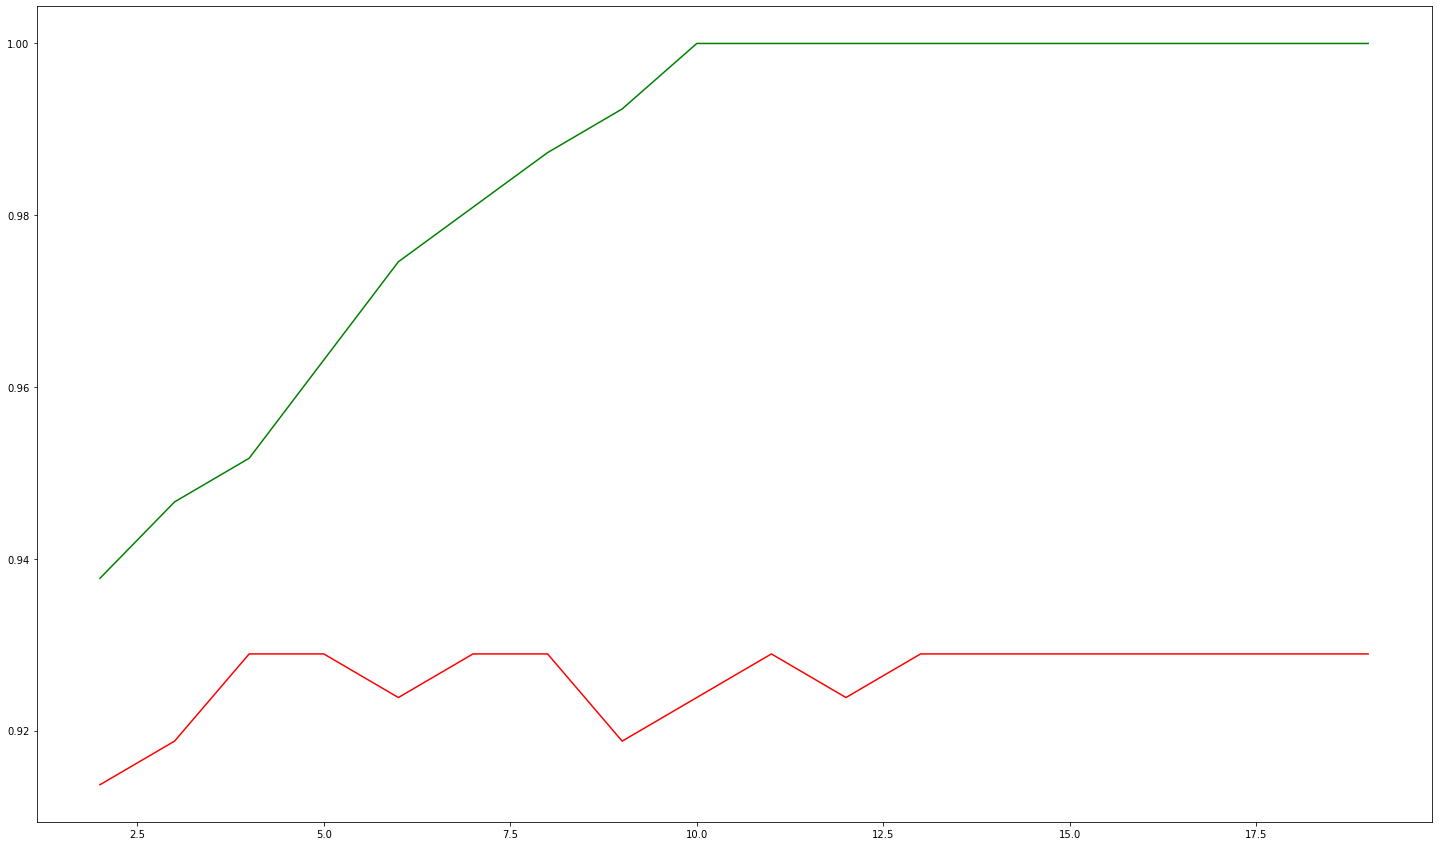

In [43]:
tr = []
ts = []
from sklearn.tree import DecisionTreeClassifier
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="green")
plt.plot(range(2,20,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 2 - DECISION TREE CLASSIFER (MIN SAMPLES LEAF)

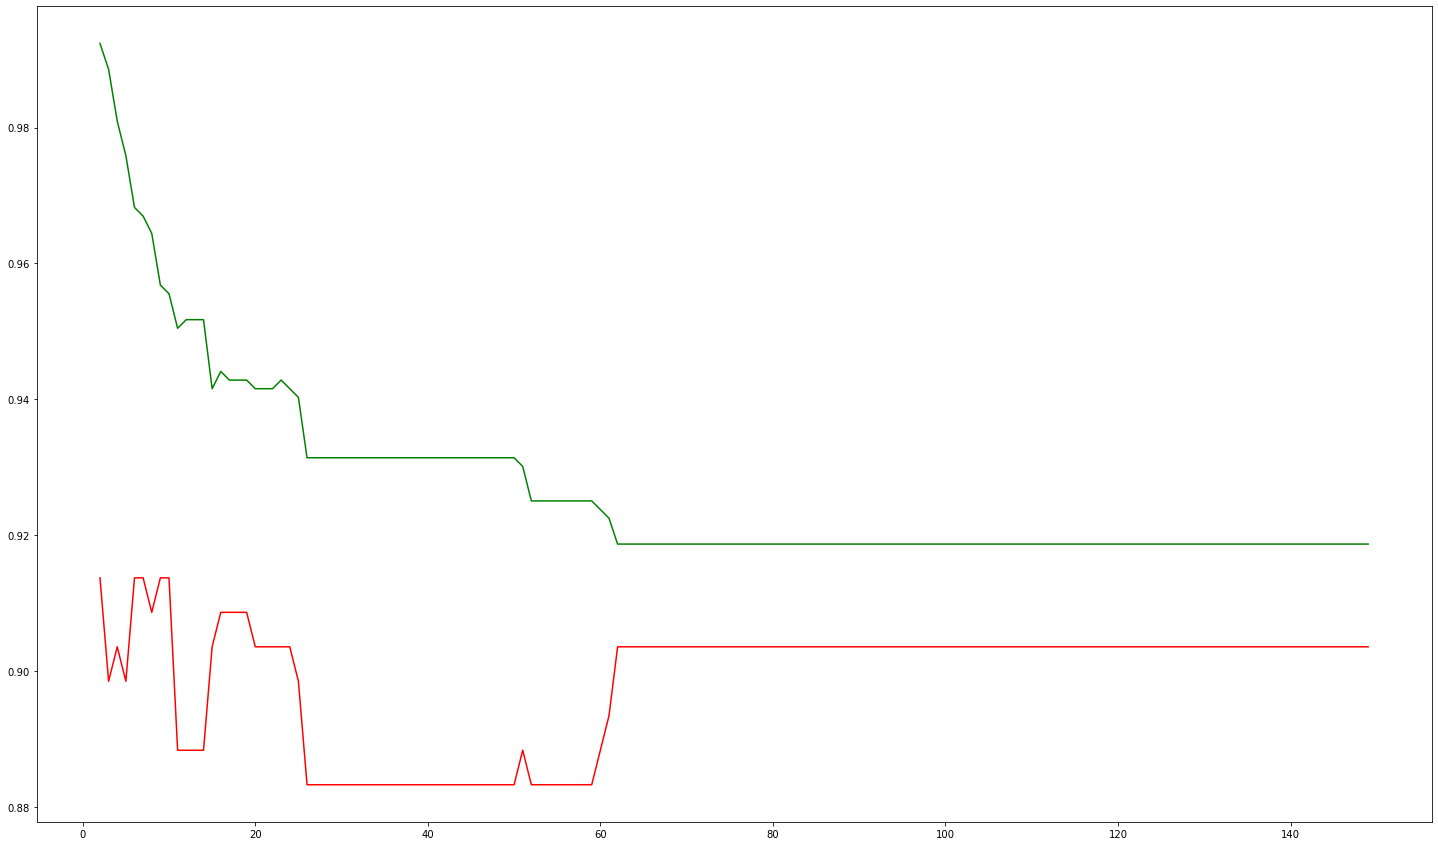

In [44]:
tr = []
ts = []
for i in range(2,150,1):
    from sklearn.ensemble import RandomForestClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,150,1),tr,c="green")
plt.plot(range(2,150,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 3 - DECISION TREE CLASSIFER (MIN SAMPLES SPLIT)

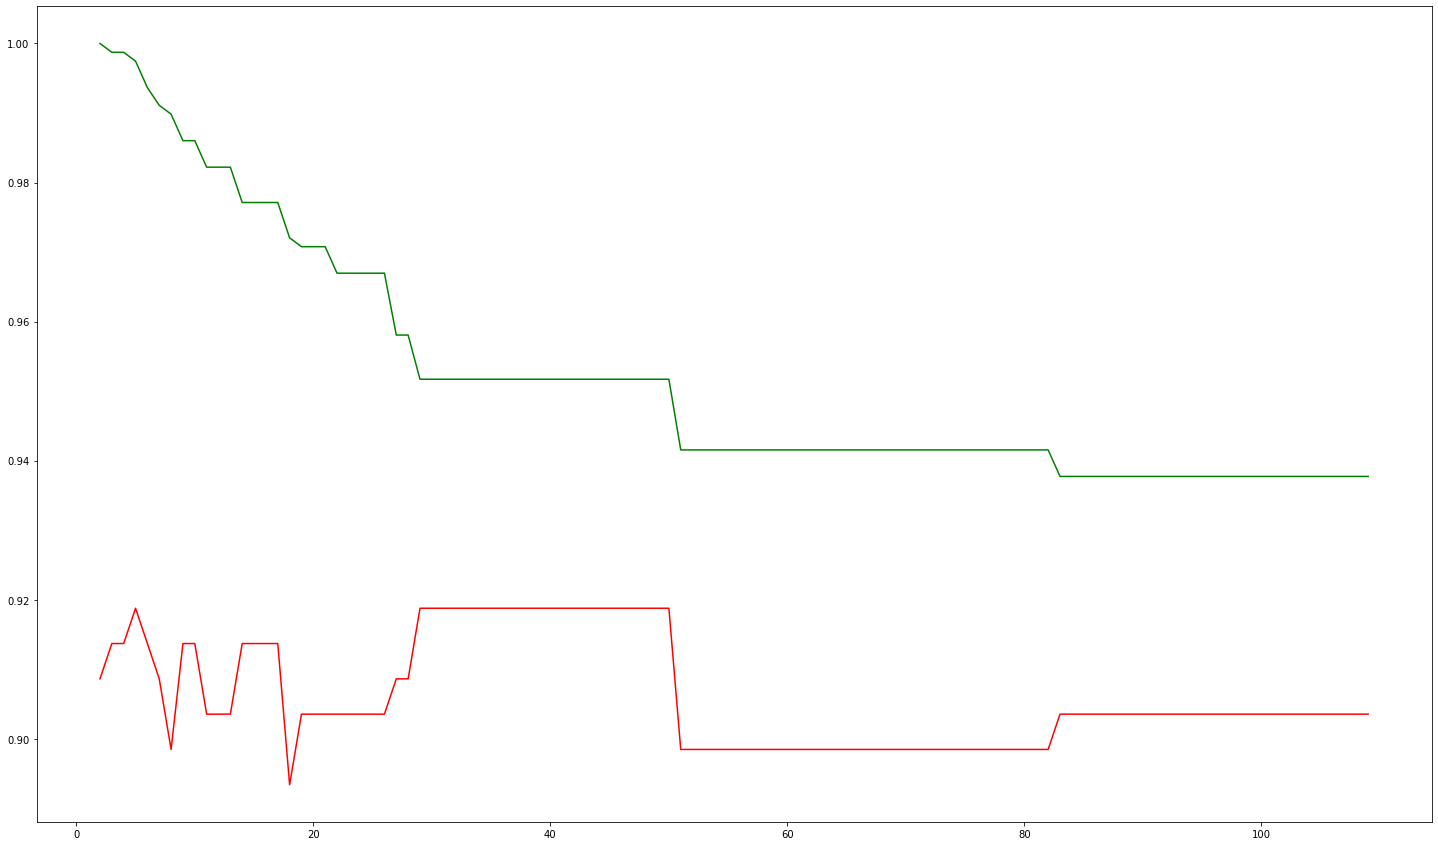

In [45]:
tr = []
ts = []
for i in range(2,110,1):
    from sklearn.ensemble import RandomForestClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,110,1),tr,c="green")
plt.plot(range(2,110,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Boosting - DECISION TREE CLASSIFER (ADABOOST CLASSIFIER)

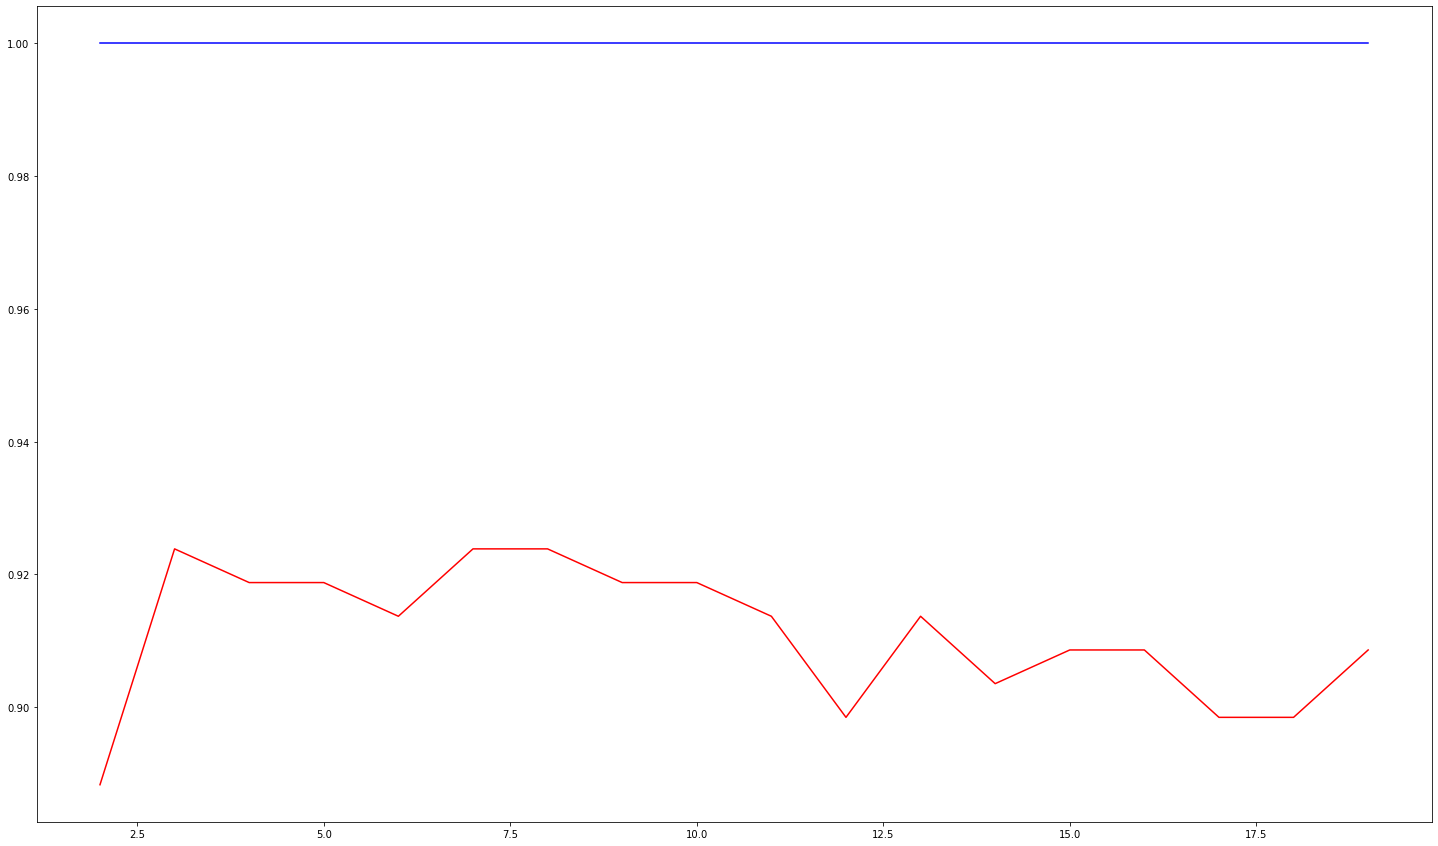

In [46]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    abc = AdaBoostClassifier(dtc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

### Decision Tree Classifier after Hyperparameter Tuning

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=36)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("The accuracy score for training the DTC:",tr_acc)
print("The accuracy score for testing the DTC:",ts_acc)

#generalization = 0.0038957939615194

The accuracy score for training the DTC: 0.9313850063532402
The accuracy score for testing the DTC: 0.883248730964467


## ---------------------------------------------------------------------------------------------------------------------------------

### Model 3 - NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model = nb.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

Training accuracy 0.86
Testing accuracy 0.827


## ---------------------------------------------------------------------------------------------------------------------------------

### Model 4 - RANDOM FOREST CLASSIFIER 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

Training accuracy 1.0
Testing accuracy 0.929


## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 1- Random Forest Classifier (MAX DEPTH)

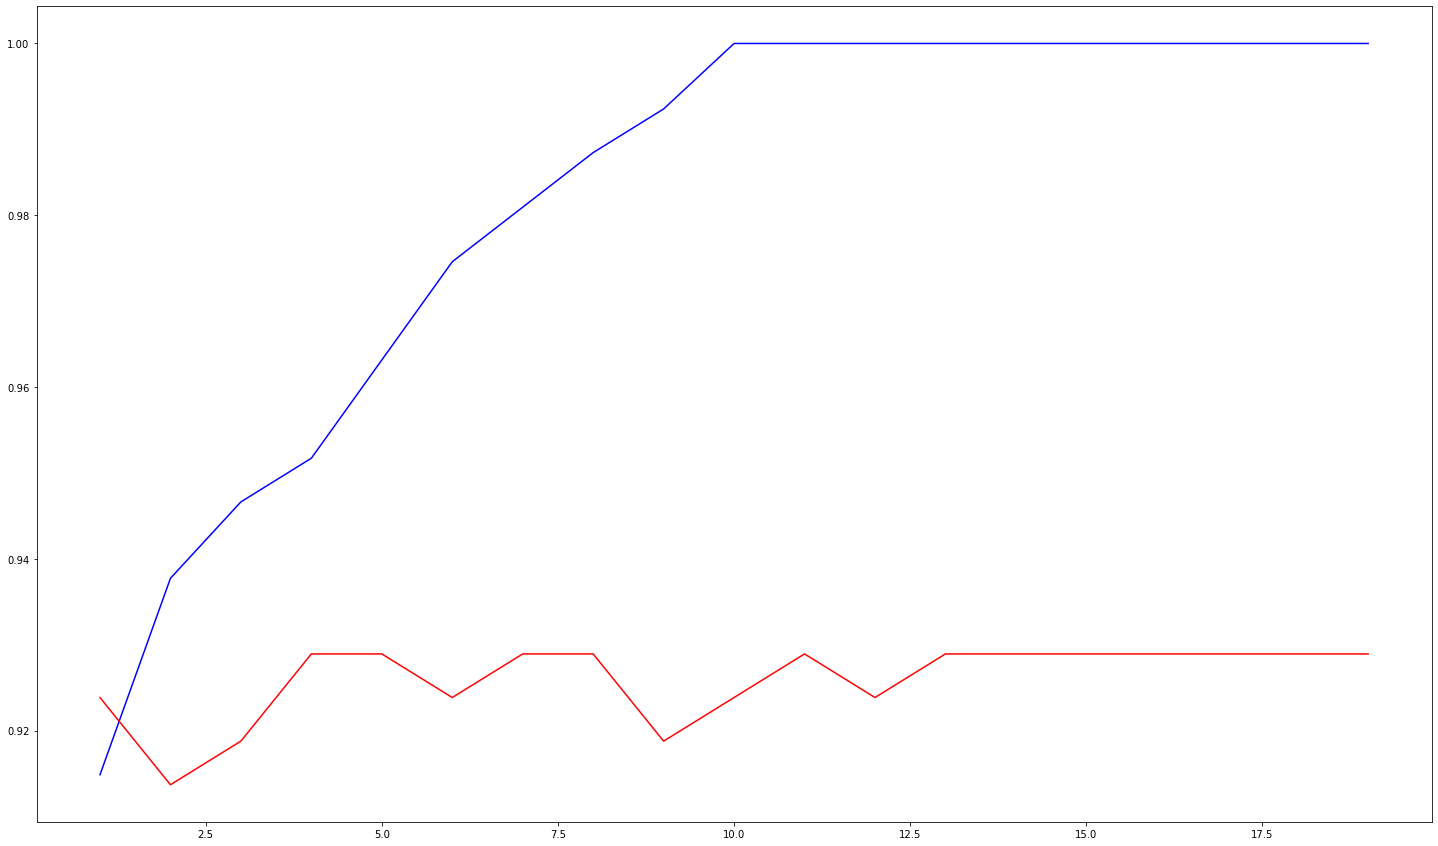

In [50]:
tr = []
ts = []
for i in range(1,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(1,20,1),tr,c="blue")
plt.plot(range(1,20,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 2 - Random Forest Classifier (MIN SAMPLES LEAF)

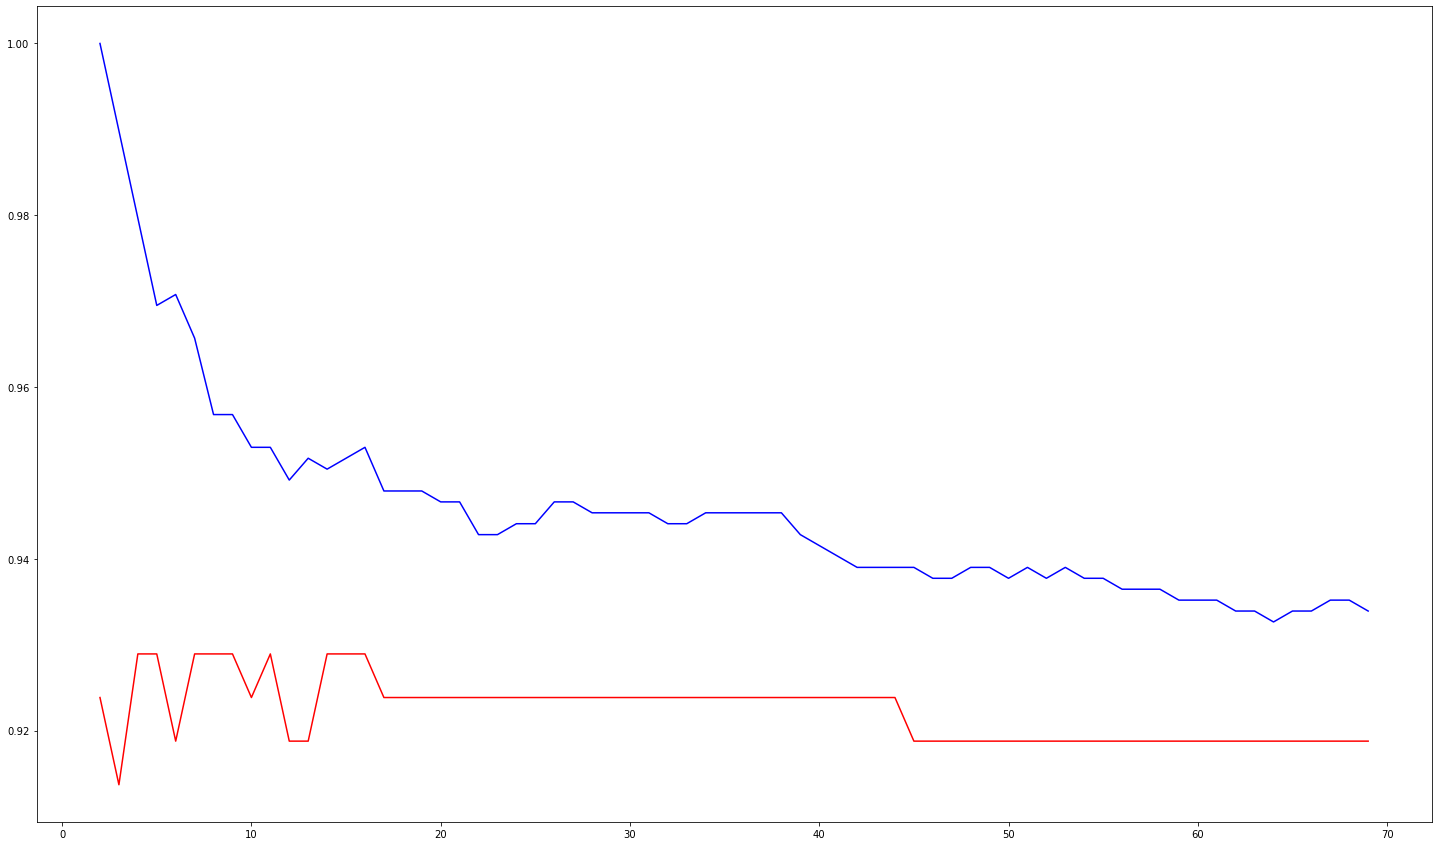

In [51]:
tr = []
ts = []
for i in range(2,70,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(2,70,1),tr,c="blue")
plt.plot(range(2,70,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 3- Random Forest Classifier (MIN SAMPLES SPLIT)

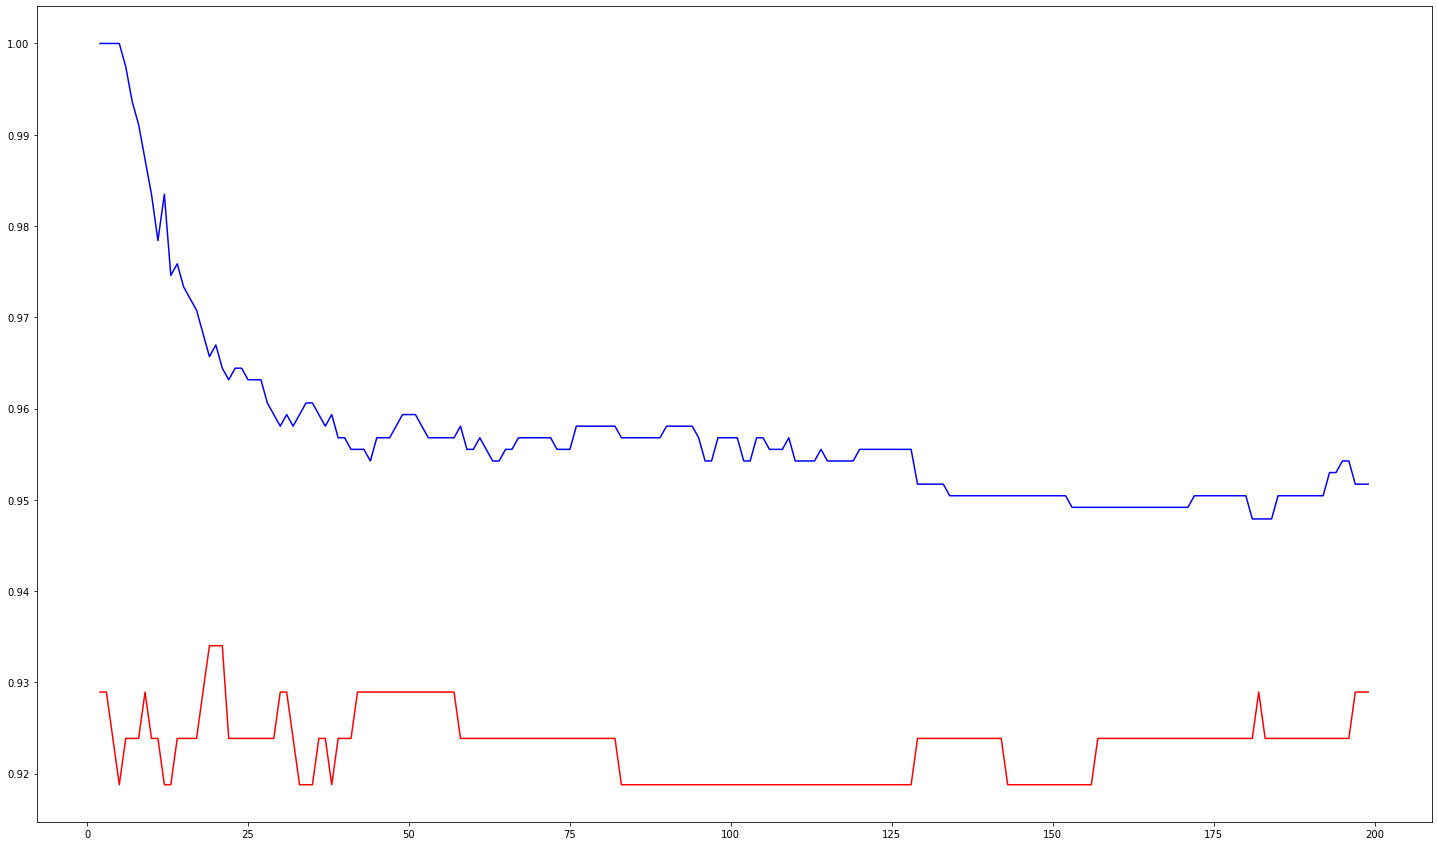

In [52]:
tr = []
ts = []
for i in range(2,200,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(2,200,1),tr,c="blue")
plt.plot(range(2,200,1),ts,c="red")

## ---------------------------------------------------------------------------------------------------------------------------------

### Hyperparameter 4- Random Forest Classifier (MIN SAMPLES SPLIT + Adaboost)

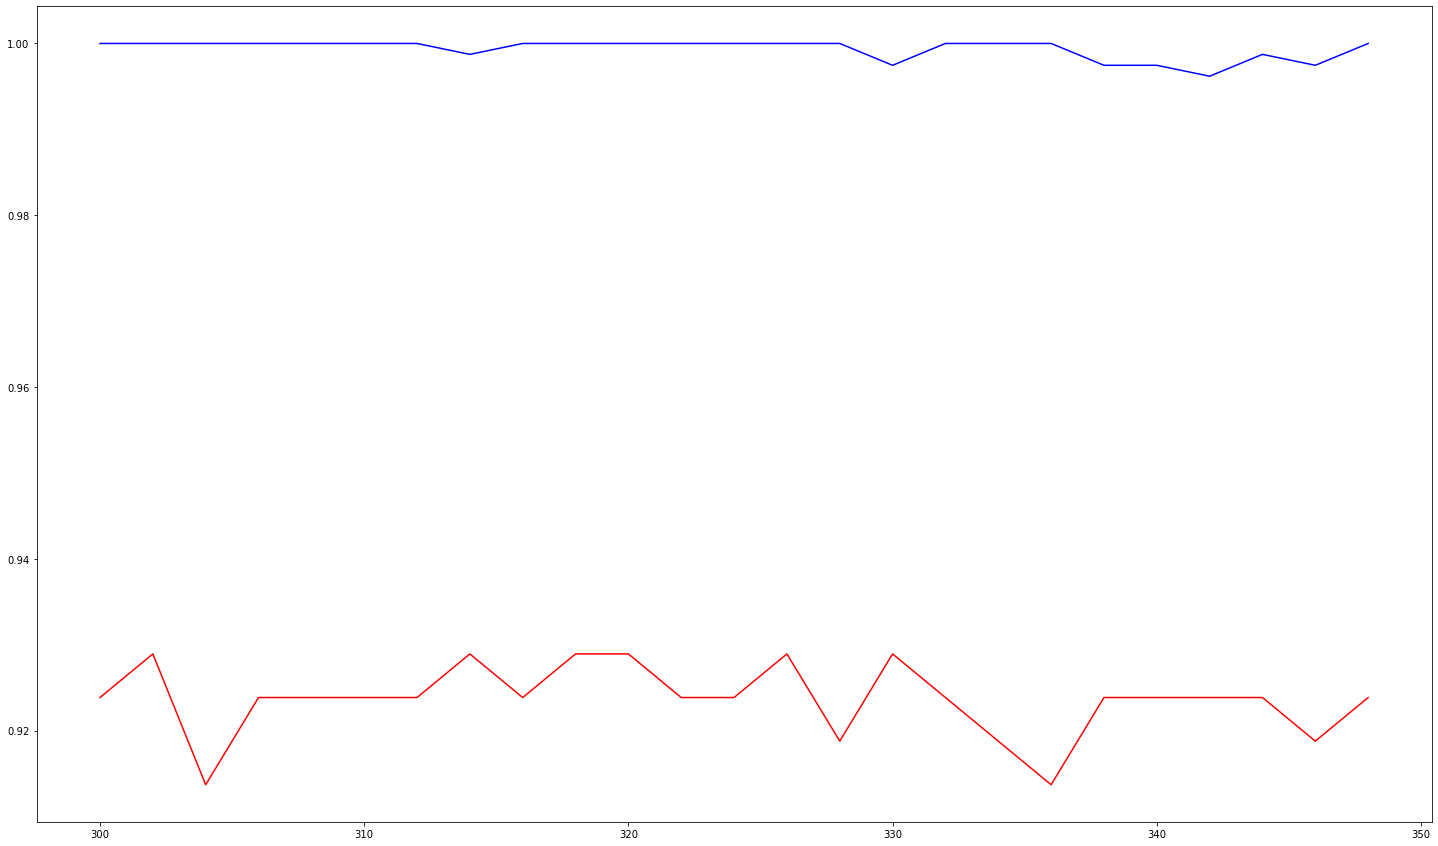

In [53]:
tr = []
ts = []
for i in range(300,350,2):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    abc = AdaBoostClassifier(rfc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
    
import matplotlib.pyplot as plt
plt.plot(range(300,350,2),tr,c="blue")
plt.plot(range(300,350,2),ts,c="red")

### Random Forest Classifier after Hyperparameter Tuning

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=2, min_samples_leaf=27)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

#error diff = 0.005

Training accuracy 0.936
Testing accuracy 0.924


## ---------------------------------------------------------------------------------------------------------------------------------

## Implemeting models for Random Over Sampling

In [55]:
upsampled.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### Logistic Regression-  ROS

In [56]:
imp_cols = []
pvals = []
from replacer import ANOVA,chisq
for i in upsampled.columns:
    if(upsampled[i].dtypes == "object"):
        pval = chisq(A,"Class",i)
        pvals.append(pval)
    else:
        pval = ANOVA(A,"Class",i)
        pvals.append(pval)

In [57]:
W = pd.DataFrame([upsampled.columns,pvals]).T
W.columns=["Col","Pval"]
Q=W[W.Pval<0.05]

In [58]:
list(Q["Col"])

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [59]:
X= upsampled.drop(labels=['Class','V22','V23','V25'],axis=1)
Y=upsampled[['Class']]
#full model - model with all the predictors

In [60]:
print(X.shape)
print(Y.shape)

(568630, 27)
(568630, 1)


In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
print("The training accuracy score for the model:",round(accuracy_score(ytrain,pred_tr),4))
print("The testing accuracy score for the model: ",round(accuracy_score(ytest,pred_ts),4))

The training accuracy score for the model: 0.9169
The testing accuracy score for the model:  0.9175


In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[217464   9988]
 [ 27801 199651]]
[[54365  2498]
 [ 6879 49984]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_ts))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     56863
           1       0.95      0.88      0.91     56863

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



### Decision Tree Classifier

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("The accuracy score for training the DTC:",tr_acc)
print("The accuracy score for testing the DTC:",ts_acc)

#generalization = 0.0964467005076142

The accuracy score for training the DTC: 1.0
The accuracy score for testing the DTC: 0.999718621951005


### Hyperparameter - 1 [DTC MAX DEPTH]

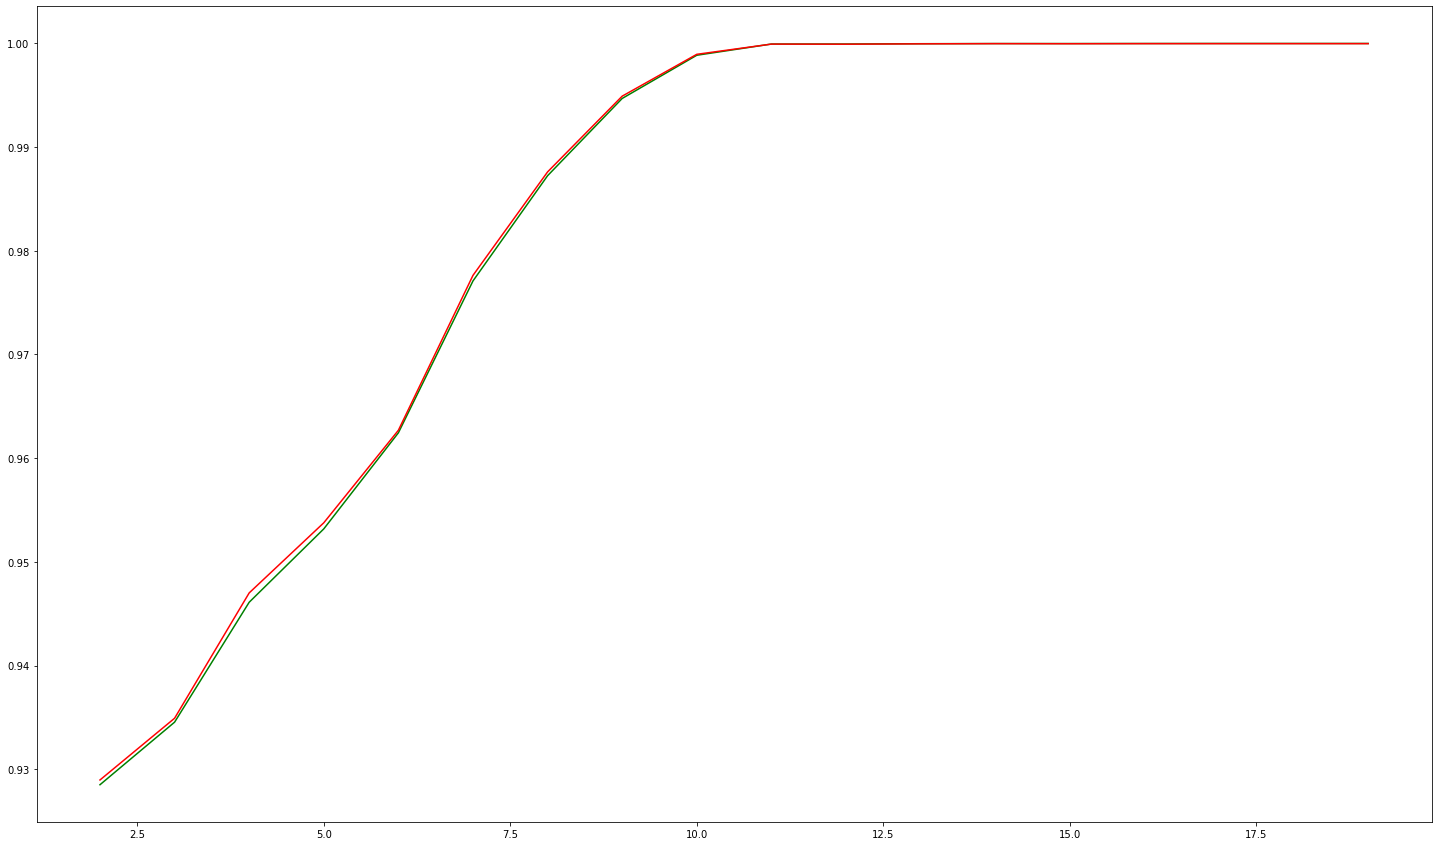

In [66]:
tr = []
ts = []
from sklearn.tree import DecisionTreeClassifier
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="green")
plt.plot(range(2,20,1),ts,c="red")

### Hyperparameter - 2 [DTC min samples leaf]

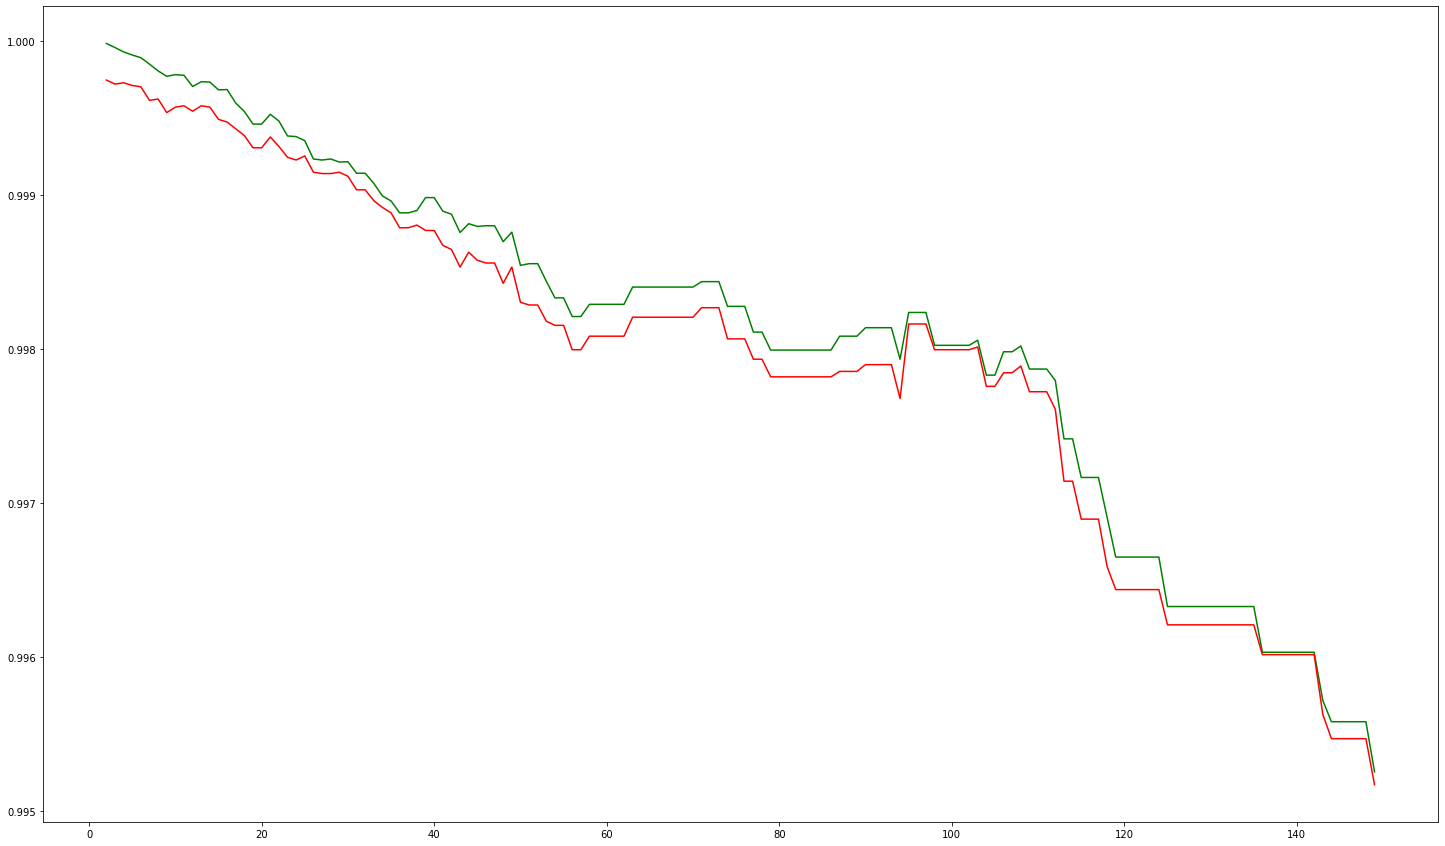

In [67]:
tr = []
ts = []
for i in range(2,150,1):
    from sklearn.ensemble import RandomForestClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,150,1),tr,c="green")
plt.plot(range(2,150,1),ts,c="red")

### Hyperparameter - 3 [DTC min samples split]

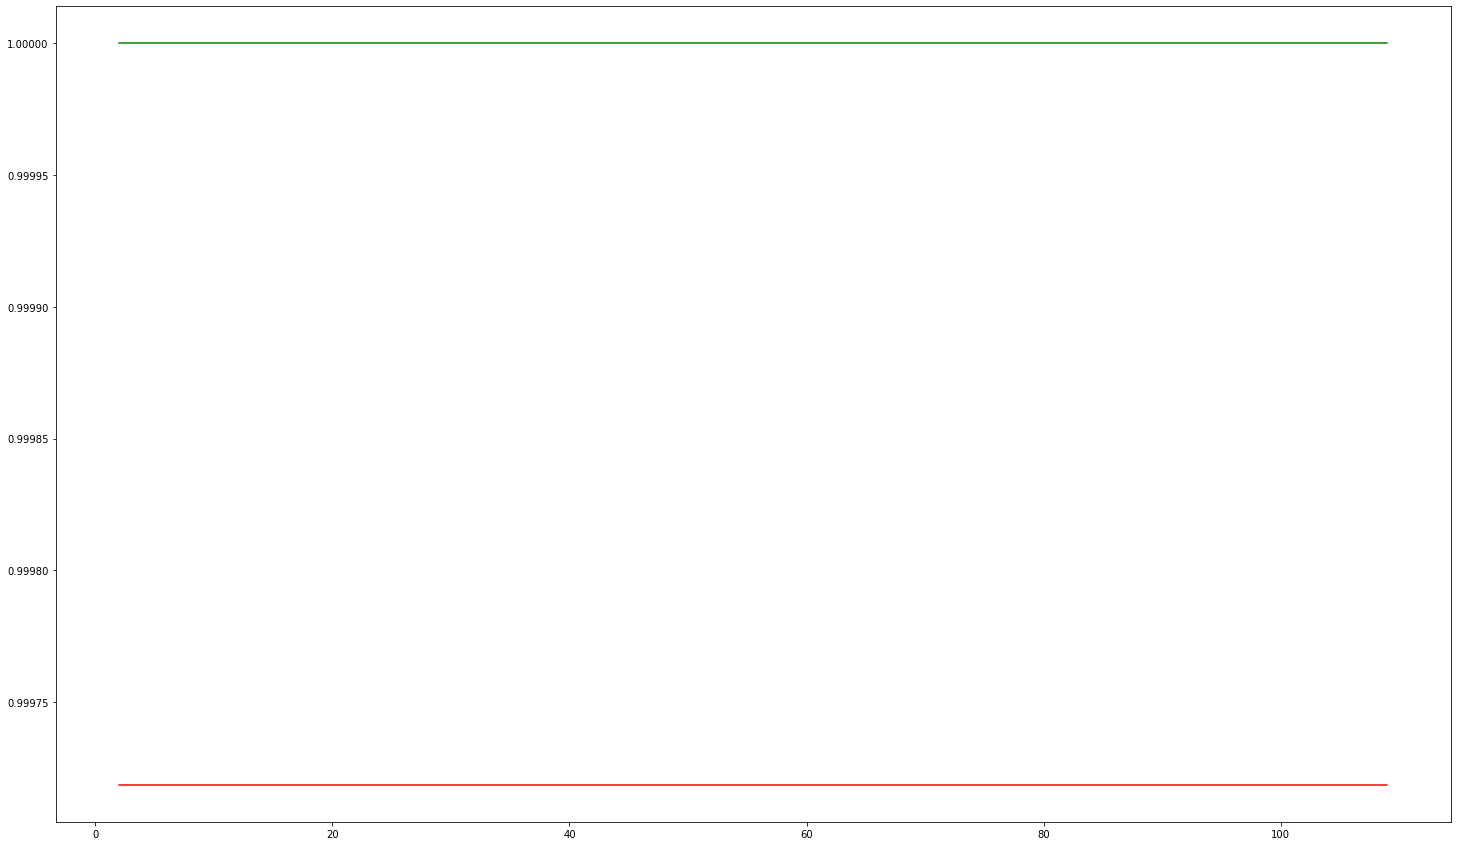

In [68]:
tr = []
ts = []
for i in range(2,110,1):
    from sklearn.ensemble import RandomForestClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,110,1),tr,c="green")
plt.plot(range(2,110,1),ts,c="red")

### Hyperparameter - 4 [DTC adaboost]

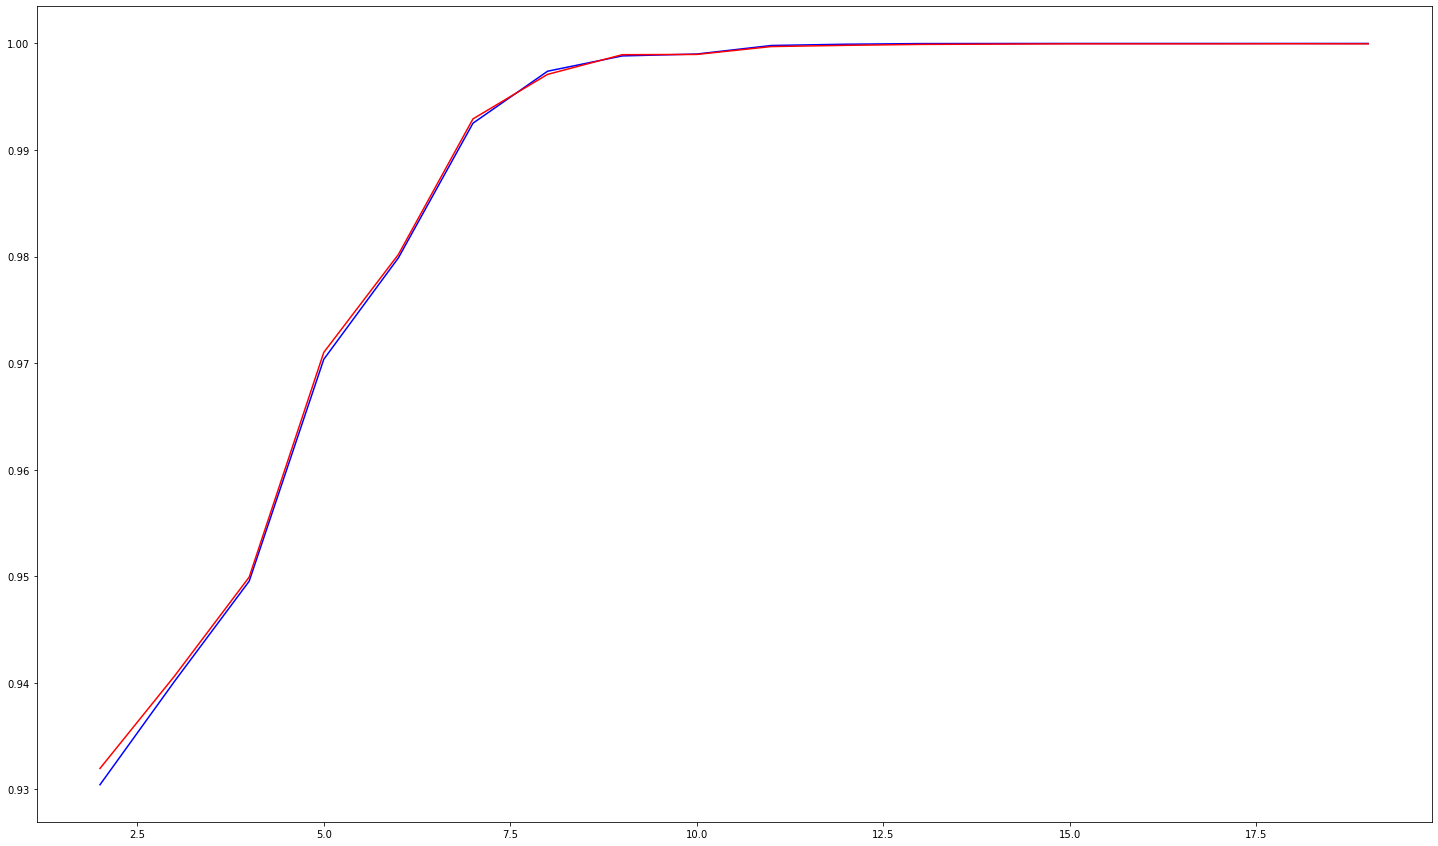

In [69]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    abc = AdaBoostClassifier(dtc,n_estimators=2)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

### DTC - final model - ROS

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=3,min_samples_leaf=95)
abc = AdaBoostClassifier(dtc,n_estimators=4)
model = abc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("The accuracy score for training the DTC:",tr_acc)
print("The accuracy score for testing the DTC:",ts_acc)

#generalization = 0.0038957939615194

The accuracy score for training the DTC: 0.9452367972143573
The accuracy score for testing the DTC: 0.9461688620016531


### Naive Bayes - ROS

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model = nb.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

Training accuracy 0.875
Testing accuracy 0.875


### Random Forest- ROS

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

Training accuracy 1.0
Testing accuracy 1.0


### Hyperparameter - 1 [RFC MAX DEPTH]

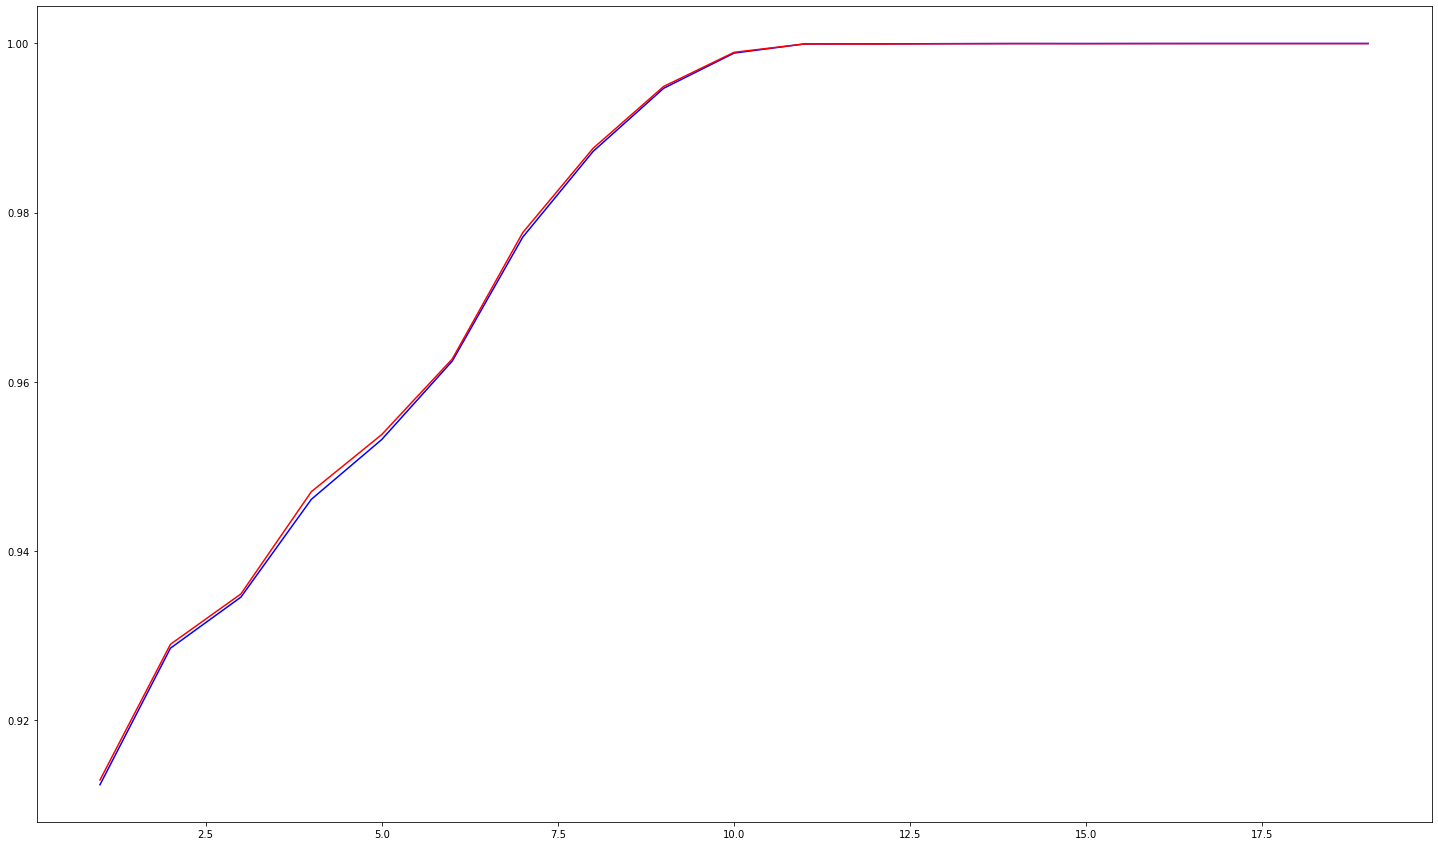

In [73]:
tr = []
ts = []
for i in range(1,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(1,20,1),tr,c="blue")
plt.plot(range(1,20,1),ts,c="red")

### Hyperparameter - 2 [RFC min samples leaf]

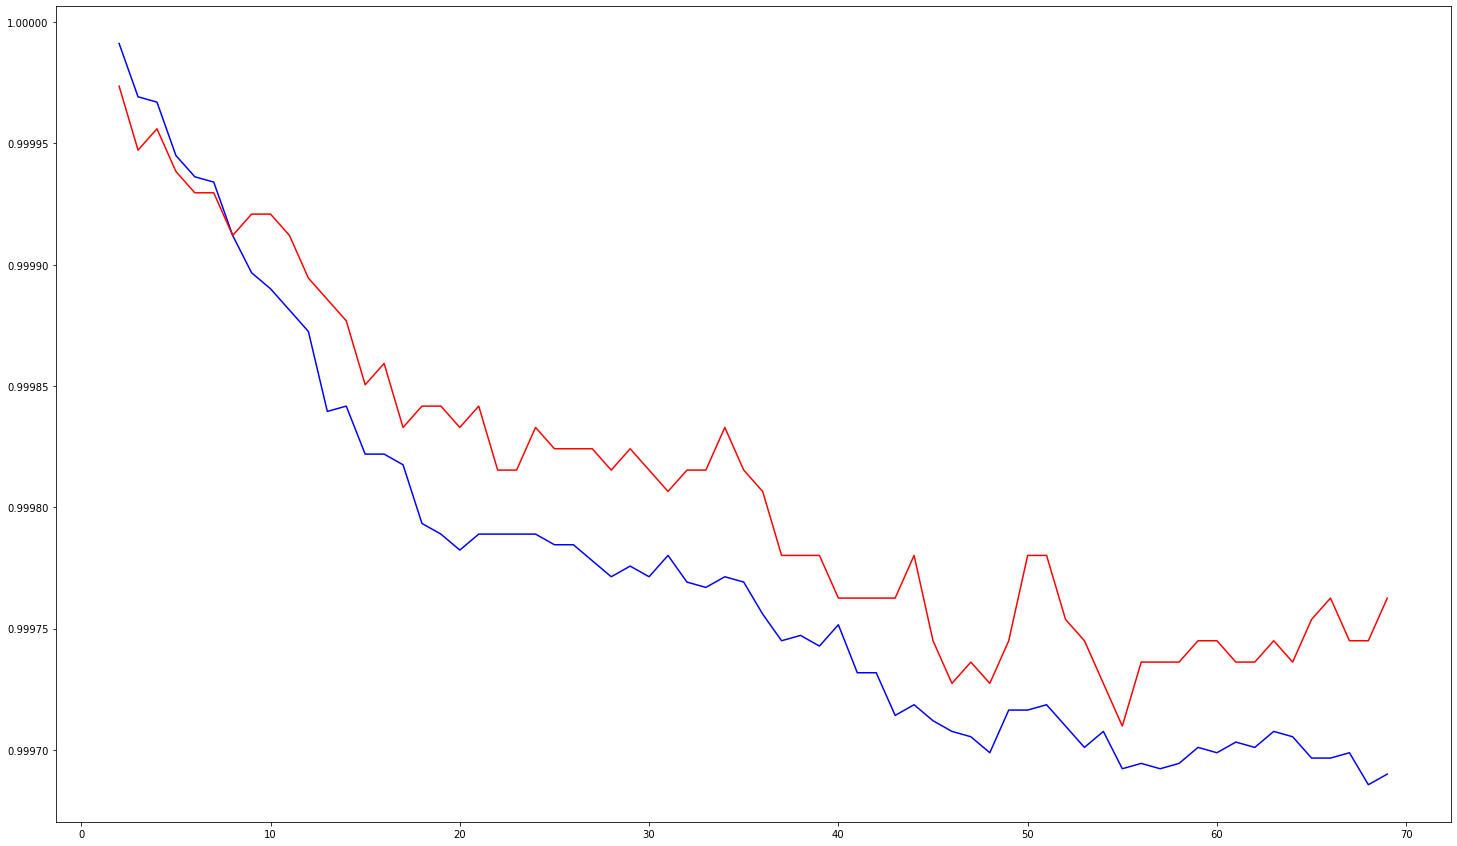

In [74]:
tr = []
ts = []
for i in range(2,70,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(2,70,1),tr,c="blue")
plt.plot(range(2,70,1),ts,c="red")

### Hyperparameter - 3 [RFC min samples split]

In [ ]:
tr = []
ts = []
for i in range(2,200,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

import matplotlib.pyplot as plt
plt.plot(range(2,200,1),tr,c="blue")
plt.plot(range(2,200,1),ts,c="red")

### Hyperparameter - 4 [RFC adaboost]

In [ ]:
tr = []
ts = []
for i in range(300,350,2):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    abc = AdaBoostClassifier(rfc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
    
    
import matplotlib.pyplot as plt
plt.plot(range(300,350,2),tr,c="blue")
plt.plot(range(300,350,2),ts,c="red")

### RFC - final model - ROS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=2, min_samples_leaf=8)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print("Training accuracy",round(tr_acc,3))
print("Testing accuracy",round(ts_acc,3))

#error diff = 0.005